# ŞEKER HASTALIĞI TEŞHİSİ




## Projenin Amacı

Bu veri seti, şeker hastalığını tespit etmeye yönelik modellerin eğitimi ve performansını değerlendirmek amacıyla kullanılmıştır. Modelin başarısı, şeker hastalığı olmayanları (Outcome 0) ve şeker hastalarını (Outcome 1) doğru bir şekilde sınıflandırma yeteneği üzerine odaklanmaktadır. Elde edilen sonuçlar, modellerin her iki sınıfta da ne kadar etkili olduğunu göstermektedir. Accuracy score, f1-score, recall ve precision metrikler, modelin her bir sınıf için ne kadar doğru ve eksiksiz tahminler yaptığını ortaya koymaktadır. Bu değerler, modelin performansını anlamak ve geliştirmek için önemli ipuçları sağlamaktadır. Bu dokümantasyon, veri ön işleme, modelin nasıl eğitildiğini, performansının nasıl değerlendirildiğini ve sonuçları açıklamaktadır.

## Projenin Adımları

##### -Kütüphanelerin eklenmesi
##### -Verilerin görselleştirilmesi
##### -Eksik veri kontrolü
##### -Aykırı değerlerin düzeltilmesi
##### -Kategorik değişkenlerin sayısal değişkenlere dönüştürülmesi
##### -Modellerin oluşturulması 
##### -Modeler için model tuning işlemi yapmak
##### -Modellerin performansının değerlendirilmesi
##### -Modellerin kıyaslamak

## Veri Seti Hikayesi

##### Bu veri seti Ulusal Diyabet ve Sindirim ve Böbrek Hastalıkları Enstitüsü'nden alınmıştır. Amacı, bir hastanın diyabetli olup olmadığını tanısal ölçümlerle tahmin etmektir. Veri setinde şu öznitelikler bulunmaktadır:
##### Pregnancies: Hamilelik sayısı
##### Glucose: Plazma glikoz konsantrasyonu
##### BloodPressure: Diyastolik kan basıncı (mm Hg)
##### SkinThickness: Triceps deri kıvrım kalınlığı (mm)
##### Insulin: 2 saatlik serum insülini (mu U/ml)
##### BMI: Vücut kitle indeksi (kg/(metre)^2)
##### DiabetesPedigreeFunction: Diyabet soy ağacı işlevi
##### Age: Yaş
##### Outcome: Şeker hastası olup olmadığı (hasta = 1, hasta değil = 0)

## kullanılan makine öğrenme modelleri 

##### 1 - Lojistik Regresyon
##### 2 - Naive Bayes
##### 4 - Support Vector Machine (SVC)
##### 5 - artificial neural nets (YSA)
##### 6 - Classification and Regression Trees  (CART)
##### 7 - Rastgele Ormanlar (RF)
##### 8 - Gradyan Boost  (GBM)
##### 9 - eXtreme Gradient Boosting (XGBoost)
##### 10 - Light GBM
##### 11 - Category Boosting (CatBoost)

## NOT

#### modeleri eğitirken underfitting veya overfitting olaylarından kaçınmaya çalıştım

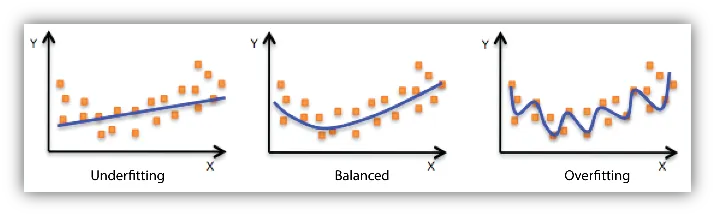

#### Makine öğrenmesindeki amaç sadece yüksek skorlar elde etmek değildir. Oluşturduğunuz modelin test verisinde nasıl işe yaradığı daha da önemlisi, gerçek hayatta kullanılabilir mi?

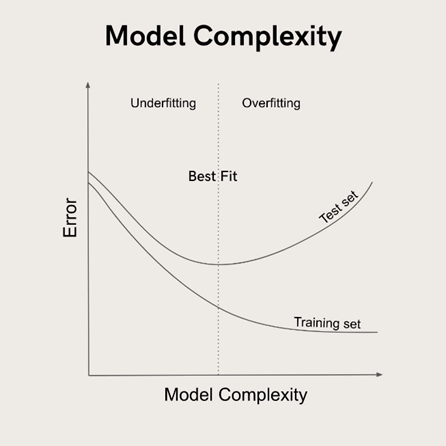

#### Amaç modelleri eğitikten sonra model tuning işlemi yapıp yukarıdaki gösterilen gibi optimum noktayı bulmak

### Kütüphaneleri Ekleme

In [3]:
import numpy as np
import pandas as pd 
import statsmodels.api as sm
import statsmodels.formula.api as smf
import seaborn as sns
from sklearn.preprocessing import scale 
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.metrics import roc_auc_score,roc_curve
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier

import warnings
warnings.filterwarnings("ignore")

## Grafikler

In [8]:
diabetes = pd.read_csv("diabetes.csv") #veri setini okuma
df = diabetes.copy() #veri setini kopyalama

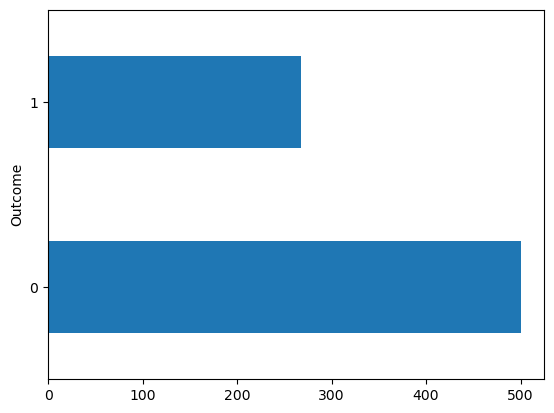

In [9]:
df['Outcome'].value_counts().plot.barh();

Şeker hastalığına sahip olan kişi sayısı 500 ,şeker hastalığı olmayan kişi sayısı 268

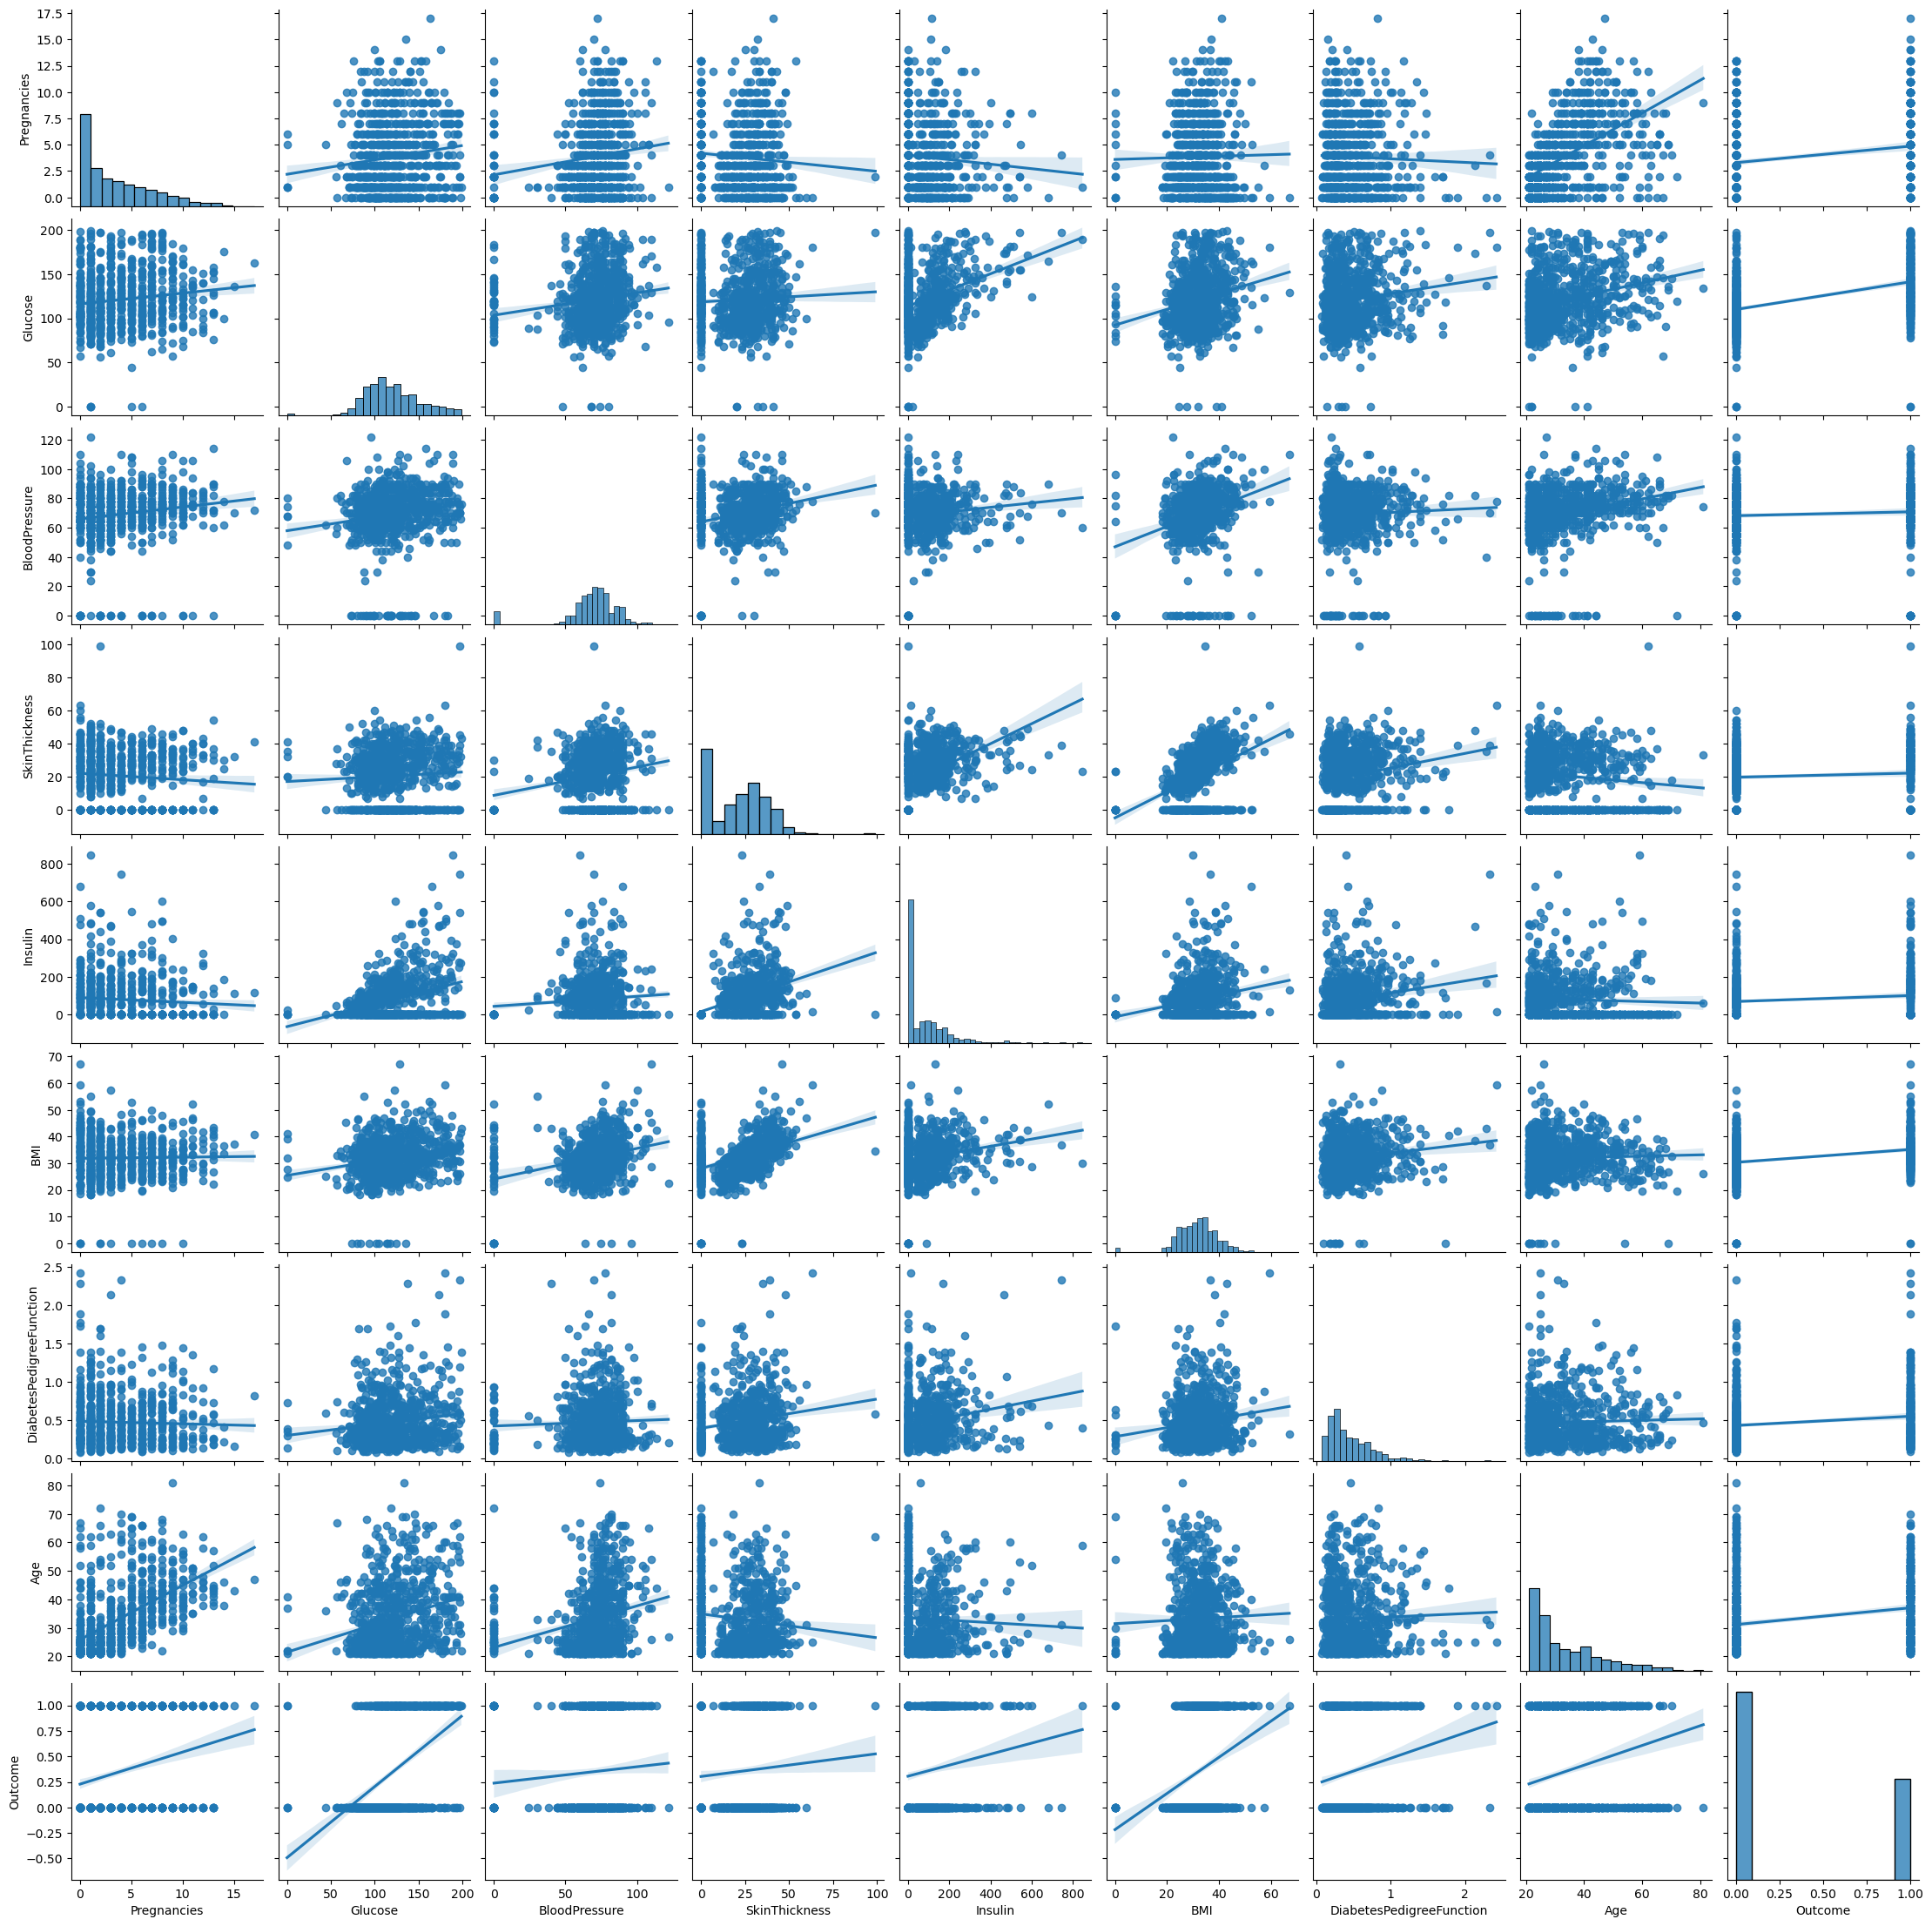

In [9]:
sns.pairplot(df,kind = "reg");

 değişkenler arasındaki ilişki görselleri

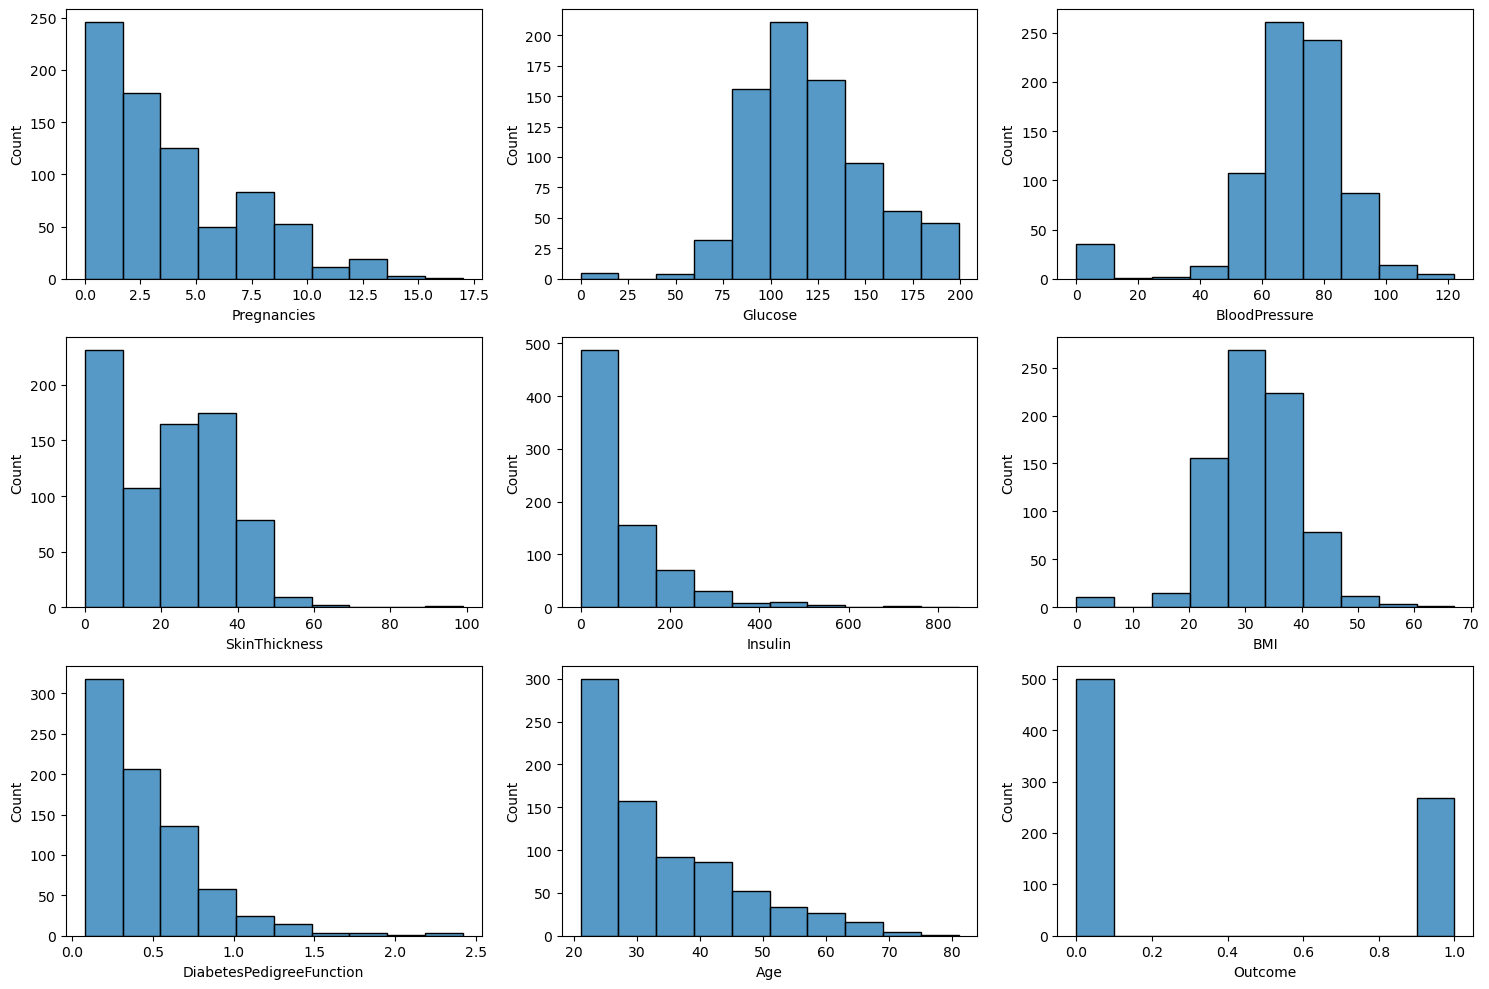

In [10]:


plt.figure(figsize=(15, 10))

plt.subplot(331)
sns.histplot(df.Pregnancies, bins=10, kde=False)
plt.subplot(332)
sns.histplot(df.Glucose, bins=10, kde=False)
plt.subplot(333)
sns.histplot(df.BloodPressure, bins=10, kde=False)
plt.subplot(334)
sns.histplot(df.SkinThickness, bins=10, kde=False)
plt.subplot(335)
sns.histplot(df.Insulin, bins=10, kde=False)
plt.subplot(336)
sns.histplot(df.BMI, bins=10, kde=False)
plt.subplot(337)
sns.histplot(df.DiabetesPedigreeFunction, bins=10, kde=False)
plt.subplot(338)
sns.histplot(df.Age, bins=10, kde=False)
plt.subplot(339)
sns.histplot(df.Outcome, bins=10, kde=False)

plt.tight_layout()
plt.show()


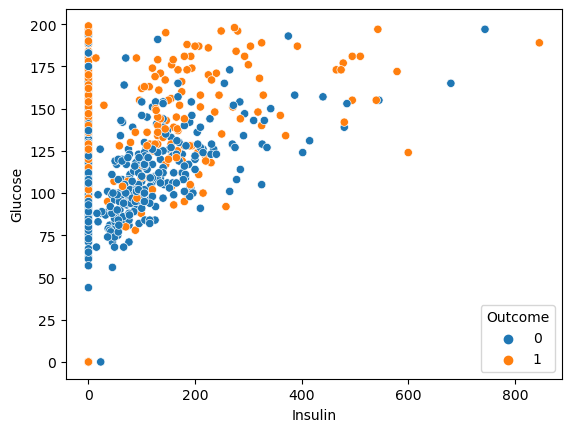

In [11]:
sns.scatterplot(x="Insulin", y="Glucose", hue="Outcome",  data=df);

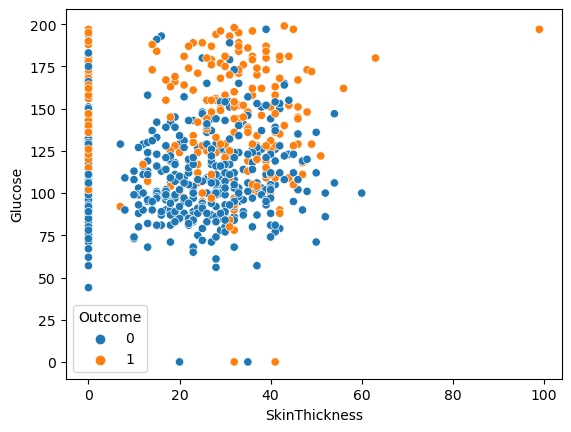

In [12]:
sns.scatterplot(x="SkinThickness", y="Glucose", hue="Outcome", data=df);

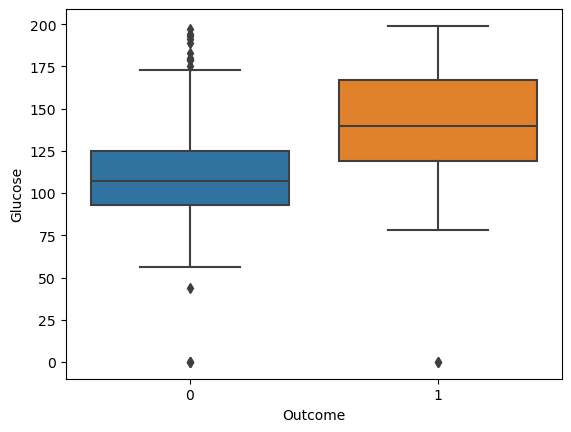

In [13]:
sns.boxplot(x="Outcome", y="Glucose", data=df);

In [15]:
df.head() #ilk 5 satır

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [16]:
df.tail() #son 5 satır

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1
767,1,93,70,31,0,30.4,0.315,23,0


In [17]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


##### veri setindeki sayısal değişkenlerin dağılımları

In [18]:
print("boyur sayısı: " ,df.ndim)
print("------------------------------\n")
print("boyut bilgis: " , df.shape)
print("------------------------------\n")
print("değişkenlerin tipi: \n" ,df.dtypes)
print("------------------------------\n")
print("veri setindeki toplam satır sayısı: " ,df.size)

boyur sayısı:  2
------------------------------

boyut bilgis:  (768, 9)
------------------------------

değişkenlerin tipi: 
 Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object
------------------------------

veri setindeki toplam satır sayısı:  6912


In [19]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

##### veri setinde eksik değer bulunmamaktadır

In [20]:
df.info

<bound method DataFrame.info of      Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0              6      148             72             35        0  33.6   
1              1       85             66             29        0  26.6   
2              8      183             64              0        0  23.3   
3              1       89             66             23       94  28.1   
4              0      137             40             35      168  43.1   
..           ...      ...            ...            ...      ...   ...   
763           10      101             76             48      180  32.9   
764            2      122             70             27        0  36.8   
765            5      121             72             23      112  26.2   
766            1      126             60              0        0  30.1   
767            1       93             70             31        0  30.4   

     DiabetesPedigreeFunction  Age  Outcome  
0                       0.627   5

In [21]:
def remove_outliers(df):
    for column in df.columns:
        if column != 'Outcome':  # Outcome sütununu atla
            Q1 = df[column].quantile(0.25)
            Q3 = df[column].quantile(0.75)
            IQR = Q3 - Q1
            lower_bound = Q1 - 1.5 * IQR
            upper_bound = Q3 + 1.5 * IQR
            df = df[(df[column] > lower_bound) & (df[column] < upper_bound)]
    return df

df = remove_outliers(df)


#### aykırı değerleri baskılama yöntemi uygulandı

##### 0 - 139 = Normal
##### 139 - 200 = yüksek
#####
##### yeni bir glikoz değişkeni oluşturup yukardaki değerlere göre dolduralım

In [22]:
df["New_Glucose"] = pd.cut(x=df["Glucose"],bins = [0,139,200],labels = ["Normal","High"])

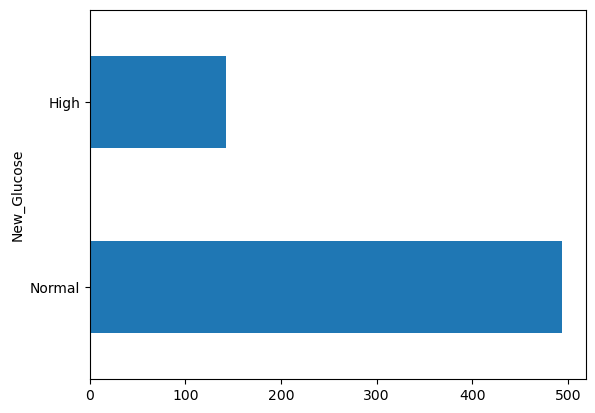

In [23]:
df.New_Glucose.value_counts().plot.barh();

494 kişi normal glikoza sahip, 142 kişi yüksek glikoza sahip

### Vucut kitle endeksinden yola çıkarak yeni bir özellik ekleyelim. özellikler = zayıf,normal,aşırı,kilolu ve obez
####
#### 18.5 'in altında  = Zayıf
#### 18.5 - 24.9 = Normal 
#### 25.0 - 29.9 = Fazla kilolu
#### 30.0 ve üzeri = Obez

In [24]:
BMIlist = ["Underweight","Normal","Overweight","Obese"]
bmı = pd.Series(BMIlist)
df["NBMI"] = bmı

df.loc[df["BMI"]<18.5 , "NBMI"] = bmı[0]
df.loc[(df["BMI"]>18.5) & (df["BMI"]<24.9) , "NBMI"] = bmı[1]
df.loc[(df["BMI"]>=25.0) & (df["BMI"]<29.9) , "NBMI"] = bmı[2]
df.loc[df["BMI"] >= 30.0 , "NBMI"] = bmı[3]

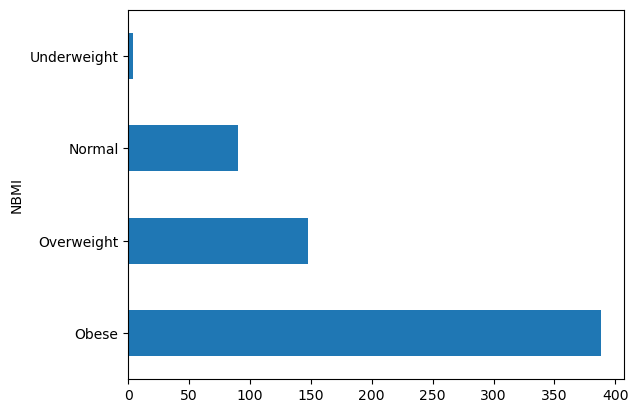

In [25]:
df.NBMI.value_counts().plot.barh();

#### 388 kişi obes
#### 148 kişi fazla kilolu
#### 90 kişi normal kilolu
#### 4 kişi zayıf

In [26]:
dm = df.iloc[:, :9]
dm.head()


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
5,5,116,74,0,0,25.6,0.201,30,0


In [27]:
dm.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.131807,0.205941,-0.090282,-0.089290,0.033049,-0.010179,0.581670,0.232391
Glucose,0.131807,1.000000,0.226342,0.016667,0.278115,0.193795,0.049141,0.270411,0.494067
BloodPressure,0.205941,0.226342,1.000000,0.043437,-0.021548,0.295835,0.017603,0.347158,0.175838
SkinThickness,-0.090282,0.016667,0.043437,1.000000,0.479038,0.389314,0.162642,-0.121766,0.047589
Insulin,-0.089290,0.278115,-0.021548,0.479038,1.000000,0.186572,0.216340,-0.050083,0.122651
BMI,0.033049,0.193795,0.295835,0.389314,0.186572,1.000000,0.146864,0.064727,0.272459
DiabetesPedigreeFunction,-0.010179,0.049141,0.017603,0.162642,0.216340,0.146864,1.000000,0.034006,0.169383
Age,0.581670,0.270411,0.347158,-0.121766,-0.050083,0.064727,0.034006,1.000000,0.265540
Outcome,0.232391,0.494067,0.175838,0.047589,0.122651,0.272459,0.169383,0.265540,1.000000


#### Outcome ile en yüksek korelasyona sahip olan değişken Glucose (0.494067)
#### Outcome ile en düşük korelasyona sahip olan değişken SkinThickness (0.047589)

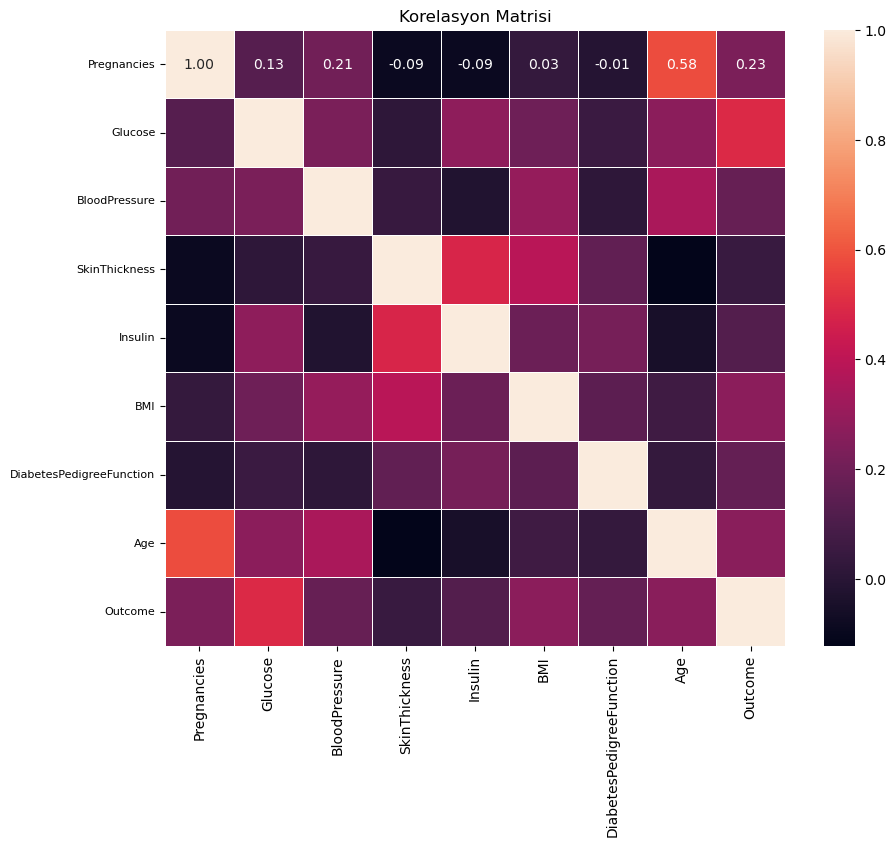

In [28]:
correlation_matrix = dm.corr()

plt.figure(figsize=(10, 8))
heatmap = sns.heatmap(correlation_matrix, annot=True, fmt=".2f", linewidths=.5)
heatmap.tick_params(axis='y', labelsize=8)
plt.title('Korelasyon Matrisi')
plt.show()


# Veri Seti

In [10]:
diabetes = pd.read_csv("diabetes.csv")
df = diabetes.copy()
df = df.dropna()
y = df["Outcome"]
X = df.drop(["Outcome"], axis=1)
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size = 0.30, 
                                                    random_state = 42)
print(y_train)
print(y_test)

334    0
139    0
485    1
547    0
18     0
      ..
71     0
106    0
270    1
435    1
102    0
Name: Outcome, Length: 537, dtype: int64
668    0
324    0
624    0
690    0
473    0
      ..
619    1
198    1
538    0
329    0
302    0
Name: Outcome, Length: 231, dtype: int64


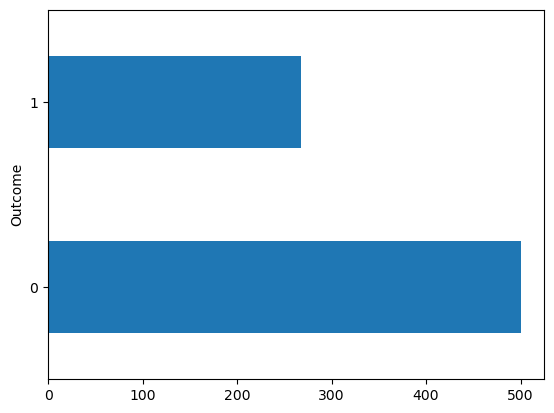

In [40]:
df["Outcome"].value_counts().plot.barh();

bu veri için her ne kadar düzensiz veri diyemesekte aralarındaki 2 kat fark olduğundan test verisini %30 aldım

# MODELLER

# Lojistik Regresyon 

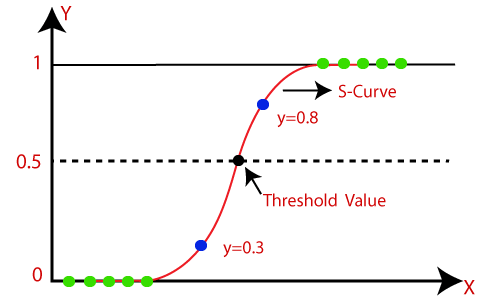

##### Amaç sınıflandırma problemi için bağımlı ve bağımsız değişkenler arasındaki işikiyi tanımlayan doğrusal bir model kurmaktır.
##### Bağımlı değişken 1 olarak tanımlanan değerinin gerçekleşme olasılığı hesapllar. Dolayısıyla bağımlı dep,ğişkenin alacağı değer ile ilgilenmez

## Model 

In [41]:
#statsmodels

In [42]:
loj = sm.Logit(y, X)
loj_model= loj.fit()
loj_model.summary()

Optimization terminated successfully.
         Current function value: 0.608498
         Iterations 5


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                Outcome   No. Observations:                  768
Model:                          Logit   Df Residuals:                      760
Method:                           MLE   Df Model:                            7
Date:                Tue, 14 May 2024   Pseudo R-squ.:                 0.05922
Time:                        21:19:07   Log-Likelihood:                -467.33
converged:                       True   LL-Null:                       -496.74
Covariance Type:            nonrobust   LLR p-value:                 2.583e-10
============================================================================================
                               coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Pregnancies                  0.1284      0.029      4.484      0.000       0.072       0.185
Glucose                      0.0129      0.003      4.757      0.000       0.008       0.018
BloodPressure               -0.0303      0.005     -6.481      0.000      -0.039      -0.021
SkinThickness                0.0002      0.006      0.032      0.974      -0.012       0.012
Insulin                      0.0007      0.001      0.942      0.346      -0.001       0.002
BMI                         -0.0048      0.011     -0.449      0.653      -0.026       0.016
DiabetesPedigreeFunction     0.3203      0.240      1.335      0.182      -0.150       0.790
Age                         -0.0156      0.008     -1.852      0.064      -0.032       0.001
============================================================================================
"""

burda Insulin (0.0007) ve SkinThickness (0.0002) değişkenlerinin katsayıların çok düşük olduğu göslenmektedir

DiabetesPedigreeFunction (0.3203) katsayısının en büyük değere sahip olduğu göslendi

In [43]:
#scikit-learn

In [44]:
from sklearn.linear_model import LogisticRegression
loj = LogisticRegression(solver = "liblinear")
loj_model = loj.fit(X,y)
loj_model

LogisticRegression(solver='liblinear')

In [45]:
loj_model.intercept_ # sabit

array([-5.88679617])

In [46]:
loj_model.coef_  # katsayılar

array([[ 1.16994476e-01,  2.83733435e-02, -1.68981359e-02,
         7.55145090e-04, -6.41407258e-04,  5.97201268e-02,
         6.76128123e-01,  7.23498971e-03]])

## Tahmin & Model Tuning

In [47]:
y_pred = loj_model.predict(X) #tahmin edilen değerler

In [48]:
pd.DataFrame(confusion_matrix(y, y_pred))

,0,1
0,448,52
1,121,147


Hata Matrisi

In [49]:
accuracy_score(y, y_pred)

0.7747395833333334

 doğruluk skoru 

In [50]:
loj_model.predict(X)[0:10]

array([1, 0, 1, 0, 1, 0, 0, 1, 1, 0], dtype=int64)

In [51]:
loj_model.predict_proba(X)[0:10][:,0:2]

array([[0.3505852 , 0.6494148 ],
       [0.91692518, 0.08307482],
       [0.22489628, 0.77510372],
       [0.92127453, 0.07872547],
       [0.16759435, 0.83240565],
       [0.79886109, 0.20113891],
       [0.8800353 , 0.1199647 ],
       [0.27795677, 0.72204323],
       [0.32053464, 0.67946536],
       [0.92264521, 0.07735479]])

In [52]:
y[0:10]

0    1
1    0
2    1
3    0
4    1
5    0
6    1
7    0
8    1
9    1
Name: Outcome, dtype: int64

In [53]:
y_probs = loj_model.predict_proba(X)
y_probs = y_probs[:,1]

In [54]:
y_probs[0:10] # tahmin edilen sınıfların olasılıkları

array([0.6494148 , 0.08307482, 0.77510372, 0.07872547, 0.83240565,
       0.20113891, 0.1199647 , 0.72204323, 0.67946536, 0.07735479])

In [55]:
y_pred = [1 if i > 0.5 else 0 for i in y_probs]

 olasılık 0.5'ten büyükse tahmin edilen sınıfı 1 olarak atar, aksi halde tahmin edilen sınıfı 0 olarak atar

In [56]:
y_pred[0:10]

[1, 0, 1, 0, 1, 0, 0, 1, 1, 0]

In [57]:
loj_model.predict_proba(X)[:,1][0:5]

array([0.6494148 , 0.08307482, 0.77510372, 0.07872547, 0.83240565])

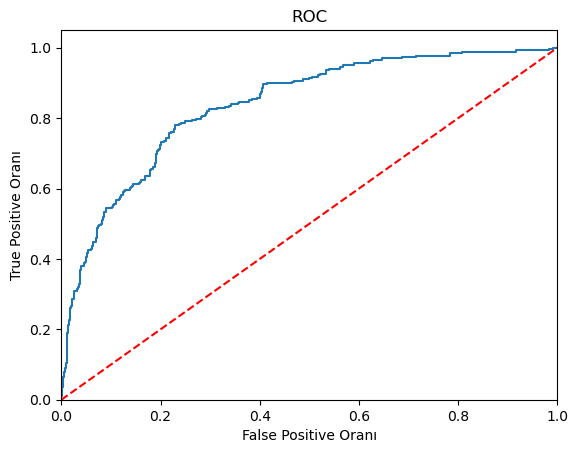

In [58]:
logit_roc_auc = roc_auc_score(y, loj_model.predict(X))

fpr, tpr, thresholds = roc_curve(y, loj_model.predict_proba(X)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='AUC (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Oranı')
plt.ylabel('True Positive Oranı')
plt.title('ROC')
plt.show()

In [59]:
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size = 0.30, 
                                                    random_state = 42)


In [60]:
loj = LogisticRegression(solver = "liblinear")
loj_model = loj.fit(X_train,y_train)
loj_model

LogisticRegression(solver='liblinear')

In [61]:
accuracy_score(y_test, loj_model.predict(X_test))

0.7532467532467533

In [62]:
print(classification_report(y, y_pred))

              precision    recall  f1-score   support

           0       0.79      0.90      0.84       500
           1       0.74      0.55      0.63       268

    accuracy                           0.77       768
   macro avg       0.76      0.72      0.73       768
weighted avg       0.77      0.77      0.77       768



#### şeker hastası olmayanlar için
##### modelin %84 doğru şekilde şeker hastası olmayanları belirtiyor
##### gerçekte şeker hastası olmayanları %90 model tarafından doğru şekilde tanımlanmıştır
#####
#### şeker hastaları için
##### modelin %63 doğru şekilde şeker hastası olanları belirtiyor
##### gerçekte şeker hastası olanların %55 model tarafından doğru şekilde tanımlanmıştır

In [63]:
cross_val_score(loj_model, X_test, y_test, cv = 10).mean()

0.7704710144927536

X_test ve y_test verileri üzerinde 10 katlı çapraz doğrulama uygulandı

# Gaussian Naive Bayes

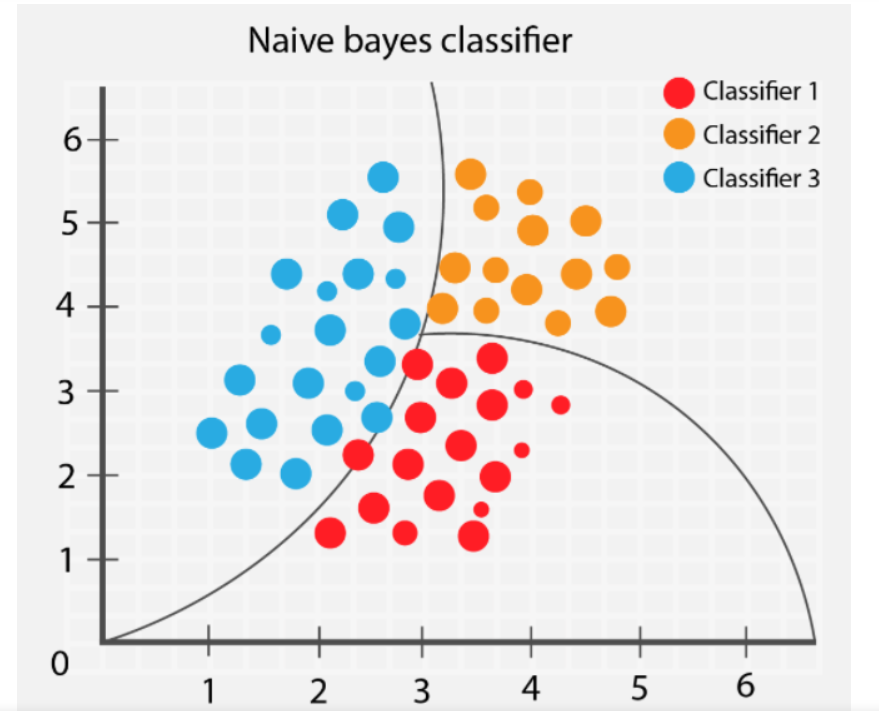

##### Olasılık temelli bir modelleme tekniği olan bu yaklaşım, belirli bir örneğin her bir sınıfa ait olma olasılığının koşullu olasılık tabanlı olarak hesaplanması amacını taşır..

### Model

In [64]:
df = diabetes.copy()
df = df.dropna()
y = df["Outcome"]
X = df.drop(['Outcome'], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.30, 
                                                    random_state=42)

In [65]:
from sklearn.naive_bayes import GaussianNB

In [66]:
nb = GaussianNB()
nb_model = nb.fit(X_train, y_train)
nb_model

GaussianNB()

In [67]:
nb_model.predict(X_test)[0:10]

array([0, 0, 0, 0, 1, 1, 0, 0, 0, 1], dtype=int64)

In [68]:
nb_model.predict_proba(X_test)[0:10]

array([[0.73815858, 0.26184142],
       [0.94027894, 0.05972106],
       [0.97242831, 0.02757169],
       [0.82840069, 0.17159931],
       [0.47153473, 0.52846527],
       [0.47274458, 0.52725542],
       [0.99607705, 0.00392295],
       [0.69925055, 0.30074945],
       [0.53838117, 0.46161883],
       [0.25004536, 0.74995464]])

In [69]:
y_pred = nb_model.predict(X_test)

In [70]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.82      0.79      0.80       151
           1       0.62      0.66      0.64        80

    accuracy                           0.74       231
   macro avg       0.72      0.73      0.72       231
weighted avg       0.75      0.74      0.75       231



In [71]:
accuracy_score(y_test, y_pred)

0.7445887445887446

In [72]:
cross_val_score(nb_model, X_test, y_test, cv = 10).mean()

0.775

# KNN-En Yakın Komşu Algoritması

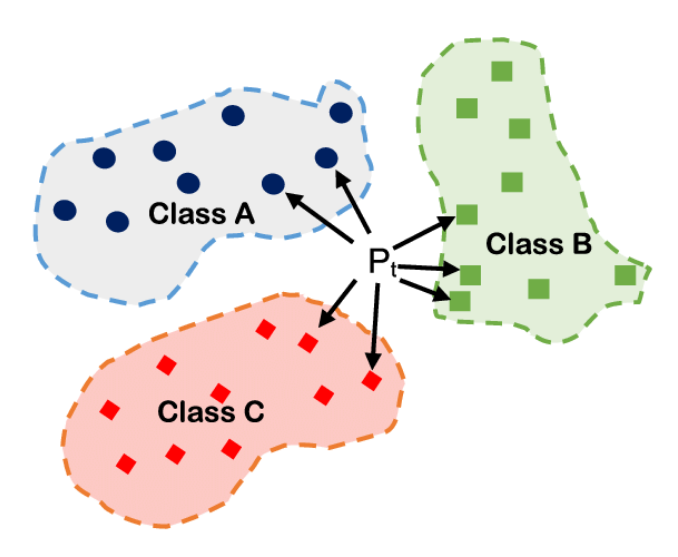

#### KNN (K-Nearest Neighbors) algoritması, en basit anlamıyla, tahmin edilecek değerin bağımsız değişkenlerinin oluşturduğu vektörün en yakın komşularının hangi sınıfa yoğun olduğu bilgisi üzerinden sınıfını tahmin etmeye dayanır.

#### KNN algoritması iki temel değer üzerinden tahmin yapar:

#### K (komşu sayısı): En yakın kaç komşu üzerinden hesaplama yapılacağını belirtir. K değeri sonucu doğrudan etkiler. K değeri 1 olduğunda, aşırı uyuma (overfitting) olasılığı çok yüksektir. Çok büyük bir K değeri ise çok genel sonuçlar elde edilmesine yol açar. Bu nedenle, optimum K değerini belirlemek, problem bağlamında önemli bir konudur.

#### Uzaklık (distance): Tahmin edilecek noktanın diğer noktalara olan uzaklığı hesaplanır. Bu hesaplama için Minkowski uzaklık hesaplama fonksiyonu kullanılır.

## Model & Tahmin

In [73]:
df = diabetes.copy()
df = df.dropna()
y = df["Outcome"]
X = df.drop(['Outcome'], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.30, 
                                                    random_state=42)

In [74]:
knn = KNeighborsClassifier()
knn_model = knn.fit(X_train, y_train)
knn_model

KNeighborsClassifier()

In [75]:
y_pred = knn_model.predict(X_test)

In [76]:
accuracy_score(y_test, y_pred)

0.6883116883116883

## Model Tuning

In [77]:
knn_params = {"n_neighbors": np.arange(1,50)} # en uygun k değerini arıyoruz

In [78]:
knn = KNeighborsClassifier()
knn_cv = GridSearchCV(knn, knn_params, cv=10)
knn_cv.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49])})

In [79]:
print("En iyi skor:" + str(knn_cv.best_score_))
print("En iyi parametreler: " + str(knn_cv.best_params_))

En iyi skor:0.748637316561845
En iyi parametreler: {'n_neighbors': 11}


In [80]:
knn = KNeighborsClassifier(11)
knn_tuned = knn.fit(X_train, y_train)

In [81]:
knn_tuned.score(X_test, y_test) #accuracy_score(y_test, y_pred) aynısıdır

0.7316017316017316

In [82]:
y_pred = knn_tuned.predict(X_test)

In [83]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.78      0.81      0.80       151
           1       0.62      0.57      0.60        80

    accuracy                           0.73       231
   macro avg       0.70      0.69      0.70       231
weighted avg       0.73      0.73      0.73       231



#  SVC (Support Vector Classifier)

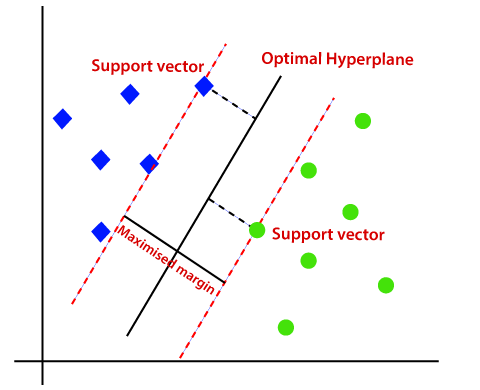

#### amacı, veri noktalarını iki veya daha fazla sınıfa ayırmak için en uygun karar sınırını bulmaktır. 
#### Temel fikri, veri noktalarını bir düzlemde veya daha yüksek boyutlu bir uzayda bölmek için bir karar sınırı oluşturmaktır. Bu karar sınırı, veri noktalarını sınıflara ayırmak için kullanılır.

## Model & Tahmin

In [84]:
df = diabetes.copy()
df = df.dropna()
y = df["Outcome"]
X = df.drop(['Outcome'], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.30, 
                                                    random_state=42)

In [85]:
svm_model = SVC(kernel = "linear").fit(X_train, y_train)

In [86]:
svm_model

SVC(kernel='linear')

In [87]:
y_pred = svm_model.predict(X_test)

In [88]:
accuracy_score(y_test, y_pred)

0.7445887445887446

## Model Tuning

In [93]:
svc_params = {"C": np.arange(1,10)}

svc = SVC(kernel = "linear")

svc_cv_model = GridSearchCV(svc,svc_params, 
                            cv = 10, 
                            n_jobs = -1, # tüm işlemci çekirdekleri kullanılır
                            verbose = 2 )

svc_cv_model.fit(X_train, y_train)

Fitting 10 folds for each of 9 candidates, totalling 90 fits


GridSearchCV(cv=10, estimator=SVC(kernel='linear'), n_jobs=-1,
             param_grid={'C': array([1, 2, 3, 4, 5, 6, 7, 8, 9])}, verbose=2)

In [96]:
print("En iyi parametreler: " + str(svc_cv_model.best_params_))

En iyi parametreler: {'C': 5}


In [97]:
svc_tuned = SVC(kernel = "linear", C = 5).fit(X_train, y_train)

In [98]:
y_pred = svc_tuned.predict(X_test)
accuracy_score(y_test, y_pred)

0.7445887445887446

In [99]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.80      0.81      0.81       151
           1       0.63      0.62      0.63        80

    accuracy                           0.74       231
   macro avg       0.72      0.72      0.72       231
weighted avg       0.74      0.74      0.74       231



In [100]:
cross_val_score(nb_model, X_test, y_test, cv = 10).mean()

0.775

# SVC RBF (Radial Basis Function)

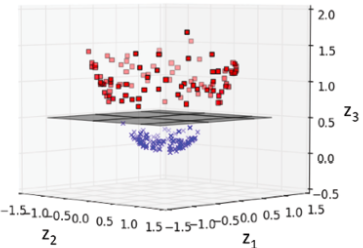

#### SVC RBF algoritması, veri noktalarını sınıflandırmak için bir karar sınırı oluşturur. Ancak, diğer SVC türlerinden farklı olarak, RBF çekirdek fonksiyonunu kullanır. Bu çekirdek fonksiyonu, veri noktalarını yüksek boyutlu uzaylara projelendirmek ve ardından bu uzayda sınıflandırma yapmak için kullanılır.

## Model & Tahmin

In [101]:
df = diabetes.copy()
df = df.dropna()
y = df["Outcome"]
X = df.drop(['Outcome'], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.30, 
                                                    random_state=42)

In [102]:
svc_model = SVC(kernel = "rbf").fit(X_train, y_train)

In [103]:
svc_model

SVC()

In [104]:
y_pred = svc_model.predict(X_test)
accuracy_score(y_test, y_pred)

0.7359307359307359

## Model Tuning

In [105]:
svc_params = {"C": [0.0001, 0.001, 0.1, 1, 5, 10 ,50 ,100],
             "gamma": [0.0001, 0.001, 0.1, 1, 5, 10 ,50 ,100]}

In [106]:
svc = SVC()
svc_cv_model = GridSearchCV(svc, svc_params, 
                         cv = 10, 
                         n_jobs = -1,
                         verbose = 2)

svc_cv_model.fit(X_train, y_train)

Fitting 10 folds for each of 64 candidates, totalling 640 fits


GridSearchCV(cv=10, estimator=SVC(), n_jobs=-1,
             param_grid={'C': [0.0001, 0.001, 0.1, 1, 5, 10, 50, 100],
                         'gamma': [0.0001, 0.001, 0.1, 1, 5, 10, 50, 100]},
             verbose=2)

In [107]:
print("En iyi parametreler: " + str(svc_cv_model.best_params_))

En iyi parametreler: {'C': 10, 'gamma': 0.0001}


In [108]:
svc_tuned = SVC(C = 10, gamma = 0.0001).fit(X_train, y_train)

In [109]:
y_pred = svc_tuned.predict(X_test)
accuracy_score(y_test, y_pred)

0.7359307359307359

In [110]:
print(classification_report(y_test, y_pred))  

              precision    recall  f1-score   support

           0       0.80      0.79      0.80       151
           1       0.62      0.62      0.62        80

    accuracy                           0.74       231
   macro avg       0.71      0.71      0.71       231
weighted avg       0.74      0.74      0.74       231



In [111]:
cross_val_score(nb_model, X_test, y_test, cv = 10).mean()

0.775

# Yapay Sinir Ağları

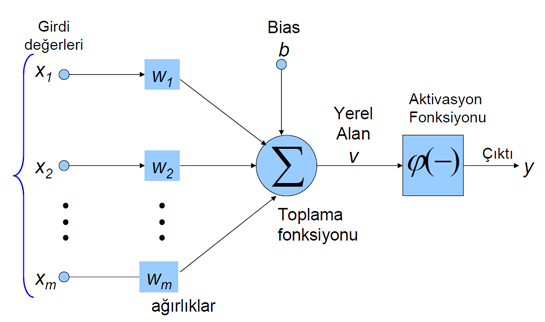

#### insan beyninin bilgi işleme şeklini referans alan sınıflandırma ve regresyon problemleri için kullanılabilen kuvvetli makine öğrenmesi algoritmalarındandan birisidir
#### Bu algoritma, sınıflandırma ve regresyon problemleri için kullanılabilir. Sınıflandırma problemlerinde, veriler farklı kategorilere ayrılır ve bir veri noktasının hangi kategoriye ait olduğunu belirlemek için kullanılır. Regresyon problemlerinde ise, verilerin arasındaki ilişkiyi modellemek ve bir değişkenin değerini tahmin etmek için kullanılır.

## Model & Tahmin

In [112]:
df = diabetes.copy()
df = df.dropna()
y = df["Outcome"]
X = df.drop(['Outcome'], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.30, 
                                                    random_state=42)

In [113]:
from sklearn.preprocessing import StandardScaler  

In [114]:
scaler = StandardScaler()

In [115]:
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [116]:
X_test_scaled[0:5]

array([[ 0.69748316, -0.70719864, -0.64639893,  0.81207927,  0.95720244,
         0.26575953, -0.11680393,  0.85019217],
       [-0.52953881, -0.27388818,  0.29399563,  0.74746428, -0.6936878 ,
         0.488933  , -0.94192338, -1.03426754],
       [-0.52953881, -0.39769117, -0.31449497, -1.3202154 , -0.6936878 ,
        -0.1543317 , -0.91266382, -1.03426754],
       [ 1.31099414, -0.42864191,  0.57058226, -1.3202154 , -0.6936878 ,
        -0.96825847,  1.12965312,  0.07927683],
       [ 1.00423865,  0.46892976,  1.12375553, -1.3202154 , -0.6936878 ,
        -0.27248236, -0.76051413,  1.44979298]])

In [117]:
from sklearn.neural_network import MLPClassifier

In [118]:
mlpc = MLPClassifier().fit(X_train_scaled, y_train)

In [119]:
y_pred = mlpc.predict(X_test_scaled)
accuracy_score(y_test, y_pred)

0.7359307359307359

## Model Tuning

In [120]:
mlpc

MLPClassifier()

In [121]:
?mlpc

Type:        MLPClassifier
String form: MLPClassifier()
File:        c:\users\sedat\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py
Docstring:  
Multi-layer Perceptron classifier.

This model optimizes the log-loss function using LBFGS or stochastic
gradient descent.

.. versionadded:: 0.18

Parameters
----------
hidden_layer_sizes : array-like of shape(n_layers - 2,), default=(100,)
    The ith element represents the number of neurons in the ith
    hidden layer.

activation : {'identity', 'logistic', 'tanh', 'relu'}, default='relu'
    Activation function for the hidden layer.

    - 'identity', no-op activation, useful to implement linear bottleneck,
      returns f(x) = x

    - 'logistic', the logistic sigmoid function,
      returns f(x) = 1 / (1 + exp(-x)).

    - 'tanh', the hyperbolic tan function,
      returns f(x) = tanh(x).

    - 'relu', the rectified linear unit function,
      returns f(x) = max(0, x)

solver : {'lbfgs', 'sgd', 'adam'}, defa

In [122]:
mlpc_params = {"alpha": [0.1, 0.01, 0.02, 0.005, 0.0001,0.00001],
              "hidden_layer_sizes": [(10,10,10),
                                     (100,100,100),
                                     (100,100),
                                     (3,5), 
                                     (5, 3)],
              "solver" : ["lbfgs","adam","sgd"],
              "activation": ["relu","logistic"]}


In [123]:
mlpc = MLPClassifier()
mlpc_cv_model = GridSearchCV(mlpc, mlpc_params, 
                         cv = 10, 
                         n_jobs = -1,
                         verbose = 2)

mlpc_cv_model.fit(X_train_scaled, y_train)

Fitting 10 folds for each of 180 candidates, totalling 1800 fits


GridSearchCV(cv=10, estimator=MLPClassifier(), n_jobs=-1,
             param_grid={'activation': ['relu', 'logistic'],
                         'alpha': [0.1, 0.01, 0.02, 0.005, 0.0001, 1e-05],
                         'hidden_layer_sizes': [(10, 10, 10), (100, 100, 100),
                                                (100, 100), (3, 5), (5, 3)],
                         'solver': ['lbfgs', 'adam', 'sgd']},
             verbose=2)

In [124]:
print("En iyi parametreler: " + str(mlpc_cv_model.best_params_))

En iyi parametreler: {'activation': 'relu', 'alpha': 0.01, 'hidden_layer_sizes': (100, 100, 100), 'solver': 'sgd'}


In [127]:
mlpc_tuned = MLPClassifier(activation = "logistic", 
                           alpha = 0.1, 
                           hidden_layer_sizes = (100, 100, 100),
                          solver = "adam")

In [128]:
mlpc_tuned.fit(X_train_scaled, y_train)

MLPClassifier(activation='logistic', alpha=0.1,
              hidden_layer_sizes=(100, 100, 100))

In [129]:
y_pred = mlpc_tuned.predict(X_test_scaled)
accuracy_score(y_test, y_pred)

0.7316017316017316

In [130]:
cross_val_score(nb_model, X_test, y_test, cv = 10).mean()

0.775

In [131]:
print(classification_report(y_test, y_pred)) 

              precision    recall  f1-score   support

           0       0.81      0.77      0.79       151
           1       0.60      0.65      0.63        80

    accuracy                           0.73       231
   macro avg       0.71      0.71      0.71       231
weighted avg       0.74      0.73      0.73       231



# CART (Sınıflandırma Ağaçları)

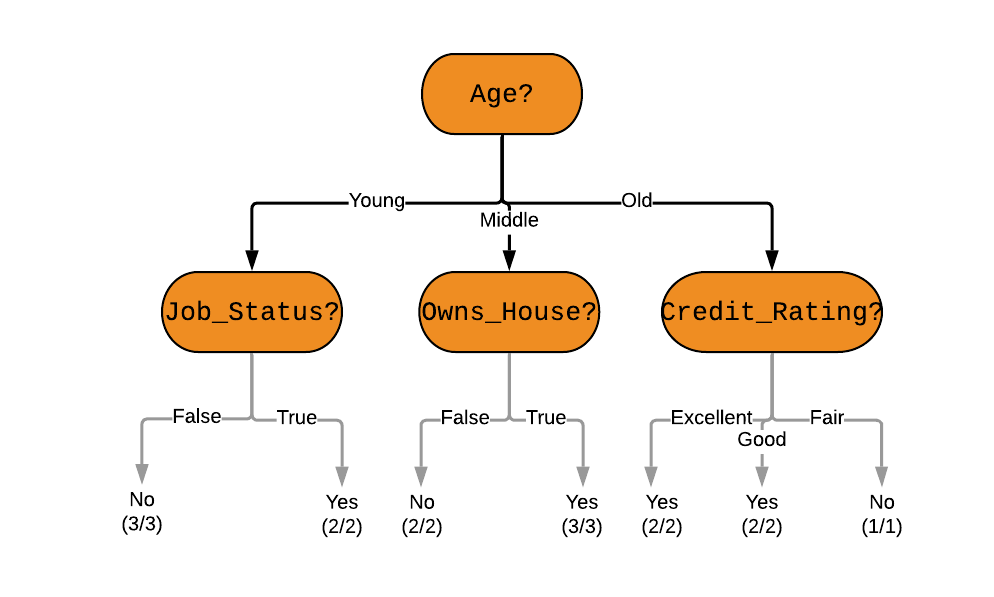

#### Bu algoritmanın temel amacı, veri setindeki karmaşık yapıları basit karar yapılarına dönüştürmektir. Yani, veri setindeki karmaşık ilişkileri anlamak ve bu ilişkileri daha anlaşılır ve yalın bir şekilde ifade etmek için kullanılır.
#### Özellikle heterojen veri setleri üzerinde etkili olan bu algoritma, belirlenmiş bir hedef değişkene göre homojen alt gruplara ayırma işlemi gerçekleştirir. Yani, veri setindeki farklı değişkenler arasındaki ilişkileri ve etkileşimleri belirleyerek, bu bilgiyi kullanarak veri setini daha küçük ve daha anlamlı parçalara böler.

## Model & Tahmin

In [132]:
df = diabetes.copy()
df = df.dropna()
y = df["Outcome"]
X = df.drop(['Outcome'], axis=1)
#X = df["Pregnancies"]
X = pd.DataFrame(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.30, 
                                                    random_state=42)

In [133]:
from sklearn.tree import DecisionTreeClassifier

In [134]:
cart = DecisionTreeClassifier()
cart_model = cart.fit(X_train, y_train)

In [135]:
cart_model

DecisionTreeClassifier()

In [141]:
#!pip install skompiler
#!pip install astor

from skompiler import skompile
print(skompile(cart_model.predict).to("python/code"))

((((((0 if x[6] <= 0.671999990940094 else 1 if x[6] <= 0.6974999904632568 else
    0) if x[5] <= 31.40000057220459 else ((0 if x[3] <= 40.5 else 1) if x[1
    ] <= 111.5 else ((0 if x[5] <= 32.59999942779541 else 1) if x[5] <= 
    37.39999961853027 else 0) if x[2] <= 72.0 else 1) if x[4] <= 9.0 else (
    0 if x[6] <= 0.6395000219345093 else 1 if x[6] <= 0.6759999990463257 else
    0) if x[0] <= 4.5 else 0 if x[6] <= 0.39149999618530273 else 1) if x[5] <=
    49.10000038146973 else 1) if x[1] <= 127.5 else 1 if x[2] <= 56.0 else 
    (0 if x[7] <= 27.5 else 1 if x[5] <= 28.149999618530273 else 0) if x[5] <=
    30.300000190734863 else 1 if x[5] <= 32.000000953674316 else ((0 if x[5
    ] <= 33.75 else 1) if x[0] <= 0.5 else 1 if x[5] <= 32.45000076293945 else
    0) if x[2] <= 85.0 else 1) if x[7] <= 28.5 else (1 if x[7] <= 29.5 else
    (0 if x[1] <= 133.0 else (0 if x[2] <= 66.5 else 1) if x[2] <= 73.0 else
    0) if x[2] <= 94.0 else 1 if x[6] <= 0.6269999742507935 else 0) if x[5] 

In [142]:
x = [9]

In [143]:
((0 if x[0] <= 2.5 else 0) if x[0] <= 6.5 else 1 if x[0] <= 13.5 else 1)

1

In [144]:
y_pred = cart_model.predict(X_test)
accuracy_score(y_test, y_pred)

0.696969696969697

## Model Tuning

In [145]:
cart_model

DecisionTreeClassifier()

In [146]:
?cart_model

Type:        DecisionTreeClassifier
String form: DecisionTreeClassifier()
File:        c:\users\sedat\anaconda3\lib\site-packages\sklearn\tree\_classes.py
Docstring:  
A decision tree classifier.

Read more in the :ref:`User Guide <tree>`.

Parameters
----------
criterion : {"gini", "entropy", "log_loss"}, default="gini"
    The function to measure the quality of a split. Supported criteria are
    "gini" for the Gini impurity and "log_loss" and "entropy" both for the
    Shannon information gain, see :ref:`tree_mathematical_formulation`.

splitter : {"best", "random"}, default="best"
    The strategy used to choose the split at each node. Supported
    strategies are "best" to choose the best split and "random" to choose
    the best random split.

max_depth : int, default=None
    The maximum depth of the tree. If None, then nodes are expanded until
    all leaves are pure or until all leaves contain less than
    min_samples_split samples.

min_samples_split : int or float, default=

In [147]:
cart_grid = {"max_depth": range(1,10),
            "min_samples_split" : list(range(2,50)) }

In [148]:
cart = tree.DecisionTreeClassifier()
cart_cv = GridSearchCV(cart, cart_grid, cv = 10, n_jobs = -1, verbose = 2)
cart_cv_model = cart_cv.fit(X_train, y_train)

Fitting 10 folds for each of 432 candidates, totalling 4320 fits


In [149]:
print("En iyi parametreler: " + str(cart_cv_model.best_params_))

En iyi parametreler: {'max_depth': 5, 'min_samples_split': 19}


In [150]:
#final

In [151]:
cart = tree.DecisionTreeClassifier(max_depth = 5, min_samples_split = 19)
cart_tuned = cart.fit(X_train, y_train)

In [152]:
y_pred = cart_tuned.predict(X_test)
accuracy_score(y_test, y_pred)

0.7532467532467533

In [153]:
print(classification_report(y_test, y_pred)) 

              precision    recall  f1-score   support

           0       0.79      0.85      0.82       151
           1       0.67      0.57      0.62        80

    accuracy                           0.75       231
   macro avg       0.73      0.71      0.72       231
weighted avg       0.75      0.75      0.75       231



In [154]:
cross_val_score(nb_model, X_test, y_test, cv = 10).mean()

0.775

# Random Forests

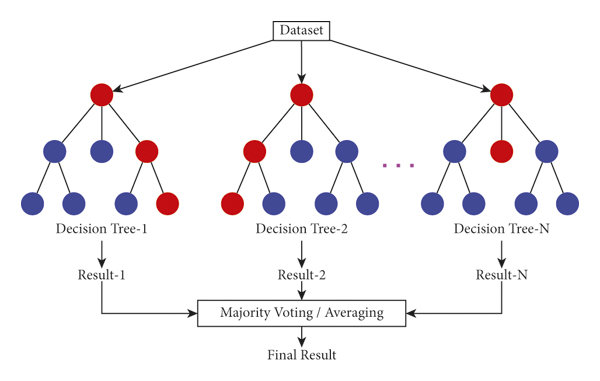

#### Bu algoritmanın temeli, birden çok karar ağacının ürettiği tahminlerin bir araya getirilerek değerlendirilmesine dayanır. Karar ağaçları, veri setindeki desenleri tanımlamak için kullanılan ağaç benzeri bir modelleme tekniğidir. Ancak, tek bir karar ağacı genellikle karmaşık veri yapılarını tam olarak yakalayamaz veya aşırı uyum sorununa yol açabilir.

## Model & Tahmin

In [155]:
df = diabetes.copy()
df = df.dropna()
y = df["Outcome"]
X = df.drop(['Outcome'], axis=1)
#X = df["Pregnancies"]
X = pd.DataFrame(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.30, 
                                                    random_state=42)

In [156]:
from sklearn.ensemble import RandomForestClassifier

In [157]:
rf_model = RandomForestClassifier().fit(X_train, y_train)

In [158]:
rf_model

RandomForestClassifier()

In [159]:
y_pred = rf_model.predict(X_test)
accuracy_score(y_test, y_pred)

0.7359307359307359

## Model Tuning

In [160]:
rf_model

RandomForestClassifier()

In [161]:
?rf_model

Type:        RandomForestClassifier
String form: RandomForestClassifier()
Length:      100
File:        c:\users\sedat\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py
Docstring:  
A random forest classifier.

A random forest is a meta estimator that fits a number of decision tree
classifiers on various sub-samples of the dataset and uses averaging to
improve the predictive accuracy and control over-fitting.
The sub-sample size is controlled with the `max_samples` parameter if
`bootstrap=True` (default), otherwise the whole dataset is used to build
each tree.

Read more in the :ref:`User Guide <forest>`.

Parameters
----------
n_estimators : int, default=100
    The number of trees in the forest.

    .. versionchanged:: 0.22
       The default value of ``n_estimators`` changed from 10 to 100
       in 0.22.

criterion : {"gini", "entropy", "log_loss"}, default="gini"
    The function to measure the quality of a split. Supported criteria are
    "gini" for the Gini impurity and 

In [162]:
rf_params = {"max_depth": [2,5,8,10],
            "max_features": [2,5,8],
            "n_estimators": [10,500,1000],
            "min_samples_split": [2,5,10]}

In [163]:
rf_model = RandomForestClassifier()

rf_cv_model = GridSearchCV(rf_model, 
                           rf_params, 
                           cv = 10, 
                           n_jobs = -1, 
                           verbose = 2) 

In [164]:
rf_cv_model.fit(X_train, y_train)

Fitting 10 folds for each of 108 candidates, totalling 1080 fits


GridSearchCV(cv=10, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': [2, 5, 8, 10], 'max_features': [2, 5, 8],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [10, 500, 1000]},
             verbose=2)

In [165]:
print("En iyi parametreler: " + str(rf_cv_model.best_params_))

En iyi parametreler: {'max_depth': 5, 'max_features': 2, 'min_samples_split': 2, 'n_estimators': 10}


In [166]:
#final

In [167]:
rf_tuned = RandomForestClassifier(max_depth = 10, 
                                  max_features = 8, 
                                  min_samples_split = 10,
                                  n_estimators = 1000)

rf_tuned.fit(X_train, y_train)

RandomForestClassifier(max_depth=10, max_features=8, min_samples_split=10,
                       n_estimators=1000)

In [168]:
y_pred = rf_tuned.predict(X_test)
accuracy_score(y_test, y_pred)

0.7619047619047619

In [169]:
print(classification_report(y_test, y_pred)) 

              precision    recall  f1-score   support

           0       0.84      0.79      0.81       151
           1       0.64      0.71      0.67        80

    accuracy                           0.76       231
   macro avg       0.74      0.75      0.74       231
weighted avg       0.77      0.76      0.76       231



In [170]:
cross_val_score(nb_model, X_test, y_test, cv = 10).mean()

0.775

In [171]:
Importance = pd.DataFrame({"Importance": rf_tuned.feature_importances_*100},
                         index = X_train.columns)

Text(0.5, 0, 'Değişken Önem Düzeyleri')

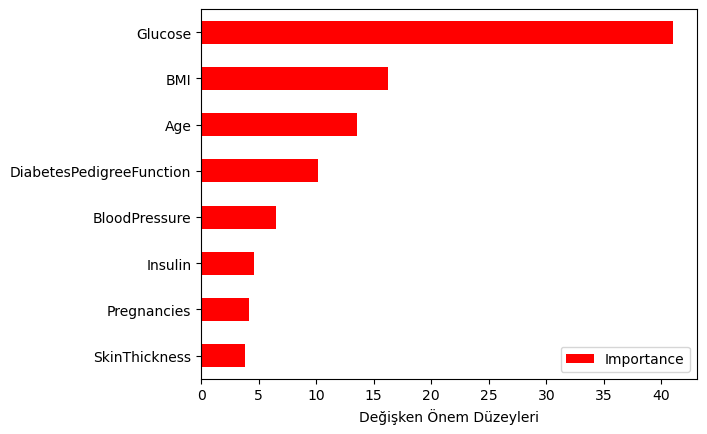

In [172]:
Importance.sort_values(by = "Importance", 
                       axis = 0, 
                       ascending = True).plot(kind ="barh", color = "r")

plt.xlabel("Değişken Önem Düzeyleri")

# Gradient Boosting Machines ( GBM )

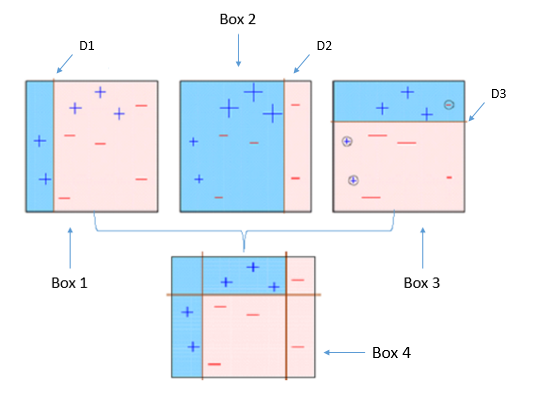

####  karar ağaçları oluşturur. Karar ağaçları, veri setindeki desenleri ve ilişkileri tanımlamak için kullanılan ağaç benzeri bir modeldir. Her bir karar ağacı, veri setindeki değişkenlerin değerlerine göre bir dizi karar kuralı ile veri noktalarını sınıflandırır veya tahmin eder.
#### , tek bir karar ağacı genellikle yetersiz veya aşırı uyumlu olabilir. Bu nedenle, bu algoritma birden çok karar ağacının ürettiği tahminleri birleştirerek daha güçlü bir model oluşturur.

## Model & Tahmin

In [173]:
df = diabetes.copy()
df = df.dropna()
y = df["Outcome"]
X = df.drop(['Outcome'], axis=1)
#X = df["Pregnancies"]
X = pd.DataFrame(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.30, 
                                                    random_state=42)

In [174]:
from sklearn.ensemble import GradientBoostingClassifier

In [175]:
gbm_model = GradientBoostingClassifier().fit(X_train, y_train)

In [176]:
y_pred = gbm_model.predict(X_test)
accuracy_score(y_test, y_pred)

0.7489177489177489

## Model Tuning

In [177]:
gbm_model

GradientBoostingClassifier()

In [178]:
?gbm_model

Type:        GradientBoostingClassifier
String form: GradientBoostingClassifier()
Length:      100
File:        c:\users\sedat\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py
Docstring:  
Gradient Boosting for classification.

This algorithm builds an additive model in a forward stage-wise fashion; it
allows for the optimization of arbitrary differentiable loss functions. In
each stage ``n_classes_`` regression trees are fit on the negative gradient
of the loss function, e.g. binary or multiclass log loss. Binary
classification is a special case where only a single regression tree is
induced.

:class:`sklearn.ensemble.HistGradientBoostingClassifier` is a much faster
variant of this algorithm for intermediate datasets (`n_samples >= 10_000`).

Read more in the :ref:`User Guide <gradient_boosting>`.

Parameters
----------
loss : {'log_loss', 'deviance', 'exponential'}, default='log_loss'
    The loss function to be optimized. 'log_loss' refers to binomial and
    multinomial deviance

In [179]:
gbm_params = {"learning_rate" : [0.001, 0.01, 0.1, 0.05],
             "n_estimators": [100,500,100],
             "max_depth": [3,5,10],
             "min_samples_split": [2,5,10]}

In [180]:
gbm = GradientBoostingClassifier()

gbm_cv = GridSearchCV(gbm, gbm_params, cv = 10, n_jobs = -1, verbose = 2)

In [181]:
gbm_cv.fit(X_train, y_train)

Fitting 10 folds for each of 108 candidates, totalling 1080 fits


GridSearchCV(cv=10, estimator=GradientBoostingClassifier(), n_jobs=-1,
             param_grid={'learning_rate': [0.001, 0.01, 0.1, 0.05],
                         'max_depth': [3, 5, 10],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [100, 500, 100]},
             verbose=2)

In [182]:
print("En iyi parametreler: " + str(gbm_cv.best_params_))

En iyi parametreler: {'learning_rate': 0.1, 'max_depth': 3, 'min_samples_split': 5, 'n_estimators': 100}


In [183]:
gbm = GradientBoostingClassifier(learning_rate = 0.01, 
                                 max_depth = 3,
                                min_samples_split = 5,
                                n_estimators = 500)

In [184]:
gbm_tuned =  gbm.fit(X_train,y_train)

In [185]:
y_pred = gbm_tuned.predict(X_test)
accuracy_score(y_test, y_pred)

0.7489177489177489

In [186]:
print(classification_report(y_test, y_pred)) 

              precision    recall  f1-score   support

           0       0.82      0.79      0.81       151
           1       0.63      0.66      0.65        80

    accuracy                           0.75       231
   macro avg       0.72      0.73      0.73       231
weighted avg       0.75      0.75      0.75       231



In [187]:
cross_val_score(nb_model, X_test, y_test, cv = 10).mean()

0.775

# eXtreme Gradient Boosting (XGBoost)

#### xgboost, GBM 'in hız ve tahmin perfonmansını artırmak üzere optimize edilmiş, ölçeklendirilebilir ve farklı platformlara entegre edilebilir halidir. hızlı ve tahmin başarısı yüksektir. kaggle' de şampiyonların algoritması olarak bilinir.kaggle' de söylenen sloganı ise "şüpheye düştüysen xgboost".

## Model & Tahmin

In [188]:
df = diabetes.copy()
df = df.dropna()
y = df["Outcome"]
X = df.drop(['Outcome'], axis=1)
#X = df["Pregnancies"]
X = pd.DataFrame(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.30, 
                                                    random_state=42)

!pip install xgboost
from xgboost import XGBClassifier

In [189]:
xgb_model = XGBClassifier().fit(X_train, y_train)

In [190]:
xgb_model

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [191]:
y_pred = xgb_model.predict(X_test)
accuracy_score(y_test, y_pred)

0.7272727272727273

## Model Tuning

In [192]:
xgb_model

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [193]:
?xgb_model

Type:        XGBClassifier
String form:
XGBClassifier(base_score=None, booster=None, callbacks=None,
           colsample_bylevel=None <...> ne, n_estimators=None, n_jobs=None,
           num_parallel_tree=None, random_state=None, ...)
File:        c:\users\sedat\anaconda3\lib\site-packages\xgboost\sklearn.py
Docstring:  
Implementation of the scikit-learn API for XGBoost classification.
See :doc:`/python/sklearn_estimator` for more information.

Parameters
----------

    n_estimators : Optional[int]
        Number of boosting rounds.

    max_depth :  Optional[int]
        Maximum tree depth for base learners.
    max_leaves :
        Maximum number of leaves; 0 indicates no limit.
    max_bin :
        If using histogram-based algorithm, maximum number of bins per feature
    grow_policy :
        Tree growing policy. 0: favor splitting at nodes closest to the node, i.e. grow
        depth-wise. 1: favor splitting at nodes with highest loss change.
    learning_rate : Optional[float

In [194]:
xgb_params = {
        'n_estimators': [100, 500, 1000, 2000],
        'subsample': [0.6, 0.8, 1.0],
        'max_depth': [3, 4, 5,6],
        'learning_rate': [0.1,0.01,0.02,0.05],
        "min_samples_split": [2,5,10]}

In [195]:
xgb = XGBClassifier()

xgb_cv_model = GridSearchCV(xgb, xgb_params, cv = 10, n_jobs = -1, verbose = 2)

In [196]:
xgb_cv_model.fit(X_train, y_train)

Fitting 10 folds for each of 576 candidates, totalling 5760 fits


GridSearchCV(cv=10,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None...
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=None, ...),
             n_jobs=-1,
             param_grid={'learning_rate': [0.1, 0.01, 0.02, 0.05],
                         'max_depth': [3, 4, 5, 6],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [100, 500, 1000, 2000],
                         'subsample': [0.6, 0.8, 1.0]},
             verbose=2)

In [197]:
xgb_cv_model.best_params_

{'learning_rate': 0.05,
 'max_depth': 3,
 'min_samples_split': 2,
 'n_estimators': 100,
 'subsample': 1.0}

In [198]:
xgb = XGBClassifier(learning_rate = 0.01, 
                    max_depth = 6,
                    min_samples_split = 2,
                    n_estimators = 100,
                    subsample = 0.8)

In [199]:
xgb_tuned =  xgb.fit(X_train,y_train)

In [200]:
y_pred = xgb_tuned.predict(X_test)
accuracy_score(y_test, y_pred)

0.7532467532467533

In [201]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.79      0.85      0.82       151
           1       0.67      0.57      0.62        80

    accuracy                           0.75       231
   macro avg       0.73      0.71      0.72       231
weighted avg       0.75      0.75      0.75       231



In [202]:
cross_val_score(nb_model, X_test, y_test, cv = 10).mean()

0.775

# LightGBM

#### Light GBM, Gradient Boosting Machine (GBM) algoritmasının bir türüdür ve XGBoost'un eğitim süresini azaltmaya ve performansını artırmaya odaklanarak geliştirilmiştir. GBM, birçok zorlu makine öğrenimi problemine etkili bir şekilde çözüm sunan güçlü bir öğrenme algoritmasıdır. Ancak, büyük veri kümeleri ve karmaşık modellerle çalışırken eğitim süresi ve bellek kullanımı gibi sorunlarla karşılaşabilir. 

## Model & Tahmin

In [203]:
df = diabetes.copy()
df = df.dropna()
y = df["Outcome"]
X = df.drop(['Outcome'], axis=1)
#X = df["Pregnancies"]
X = pd.DataFrame(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.30, 
                                                    random_state=42)

In [204]:
!pip install lightgbm
from lightgbm import LGBMClassifier

In [205]:
lgbm_model = LGBMClassifier().fit(X_train, y_train)

[LightGBM] [Info] Number of positive: 188, number of negative: 349
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000163 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 606
[LightGBM] [Info] Number of data points in the train set: 537, number of used features: 8
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.350093 -> initscore=-0.618630
[LightGBM] [Info] Start training from score -0.618630
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf


In [206]:
y_pred = lgbm_model.predict(X_test)
accuracy_score(y_test, y_pred)

0.7229437229437229

## Model Tuning

In [207]:
lgbm_model

LGBMClassifier()

In [208]:
?lgbm_model

Type:           LGBMClassifier
String form:    LGBMClassifier()
File:           c:\users\sedat\anaconda3\lib\site-packages\lightgbm\sklearn.py
Docstring:      LightGBM classifier.
Init docstring:
Construct a gradient boosting model.

Parameters
----------
boosting_type : str, optional (default='gbdt')
    'gbdt', traditional Gradient Boosting Decision Tree.
    'dart', Dropouts meet Multiple Additive Regression Trees.
    'rf', Random Forest.
num_leaves : int, optional (default=31)
    Maximum tree leaves for base learners.
max_depth : int, optional (default=-1)
    Maximum tree depth for base learners, <=0 means no limit.
learning_rate : float, optional (default=0.1)
    Boosting learning rate.
    You can use ``callbacks`` parameter of ``fit`` method to shrink/adapt learning rate
    in training using ``reset_parameter`` callback.
    Note, that this will ignore the ``learning_rate`` argument in training.
n_estimators : int, optional (default=100)
    Number of boosted trees to fit.


## Model Tuning

In [209]:
lgbm_params = {
        'n_estimators': [100, 500, 1000, 2000],
        'subsample': [0.6, 0.8, 1.0],
        'max_depth': [3, 4, 5,6],
        'learning_rate': [0.1,0.01,0.02,0.05],
        "min_child_samples": [5,10,20]}

In [210]:
lgbm = LGBMClassifier()

lgbm_cv_model = GridSearchCV(lgbm, lgbm_params, 
                             cv = 10, 
                             n_jobs = -1, 
                             verbose = 2)



In [ ]:
lgbm_cv_model.fit(X_train, y_train)

Fitting 10 folds for each of 576 candidates, totalling 5760 fits


In [ ]:
lgbm_cv_model.best_params_

In [ ]:
lgbm = LGBMClassifier(learning_rate = 0.01, 
                       max_depth = 3,
                       subsample = 0.6,
                       n_estimators = 500,
                       min_child_samples = 20)

In [ ]:
lgbm_tuned = lgbm.fit(X_train,y_train)

In [ ]:
y_pred = lgbm_tuned.predict(X_test)
accuracy_score(y_test, y_pred)

In [ ]:
print(classification_report(y_test, y_pred)) 

In [ ]:
cross_val_score(nb_model, X_test, y_test, cv = 10).mean()

# Category Boosting  ( CatBoost )

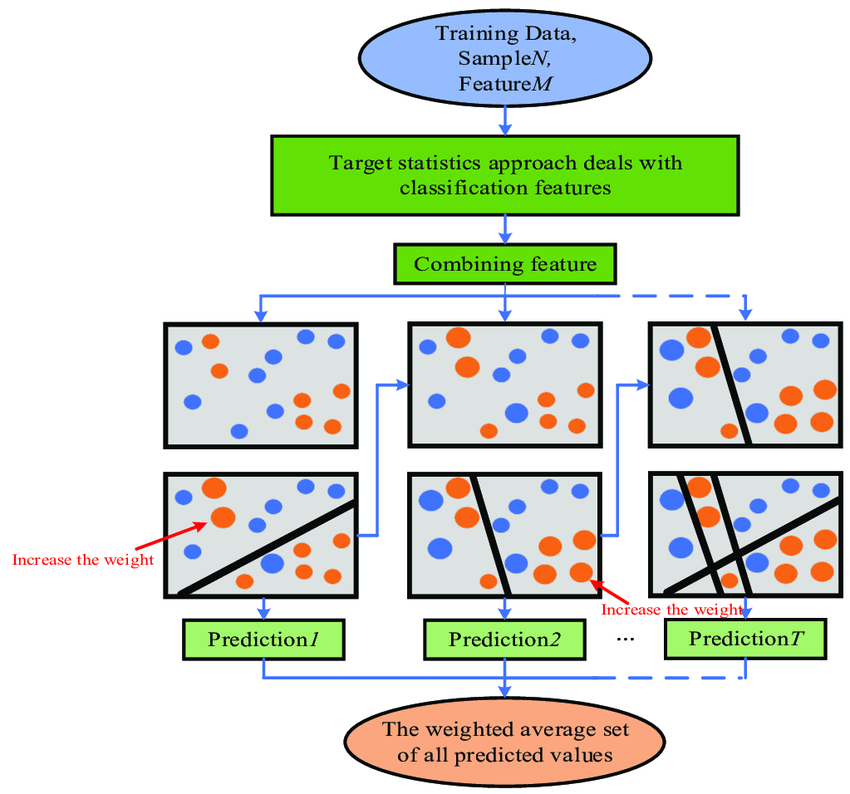

#### Gradient Boosting tabanlı açık kaynak kodlu makine öğrenmesi algoritmasıdır.Gradient Boosting'in performansını arttırmak amacıyla alternatif olarak geliştirilmiştir.Yüksek öğrenme hızı, hem sayısal hem kategorik hem de metin verileri ile çalışılabilmesi,GPU desteği ve görselleştirme seçenekleri sunması diğer algoritmalardan en çok ayrılan özelliklerindir.Kategorik veriler ile yüksek performanslı çalışabilmesinin nedeni kendine has bir kodlama metoduna sahip olmasıdır. Yani veri hazırlığı yaparken ayrıca bir kodlama işlemi yapılmasına gerek duyulmamaktadır

## Model & Tahmin

In [ ]:
df = diabetes.copy()
df = df.dropna()
y = df["Outcome"]
X = df.drop(['Outcome'], axis=1)
#X = df["Pregnancies"]
X = pd.DataFrame(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.30, 
                                                    random_state=42)

In [3]:
!pip install catboost
from catboost import CatBoostClassifier

   ---------------------------------------- 0.0/101.1 MB ? eta -:--:--
   ---------------------------------------- 0.0/101.1 MB ? eta -:--:--
   ---------------------------------------- 0.0/101.1 MB 393.8 kB/s eta 0:04:17
   ---------------------------------------- 0.1/101.1 MB 655.4 kB/s eta 0:02:35
   ---------------------------------------- 0.1/101.1 MB 654.9 kB/s eta 0:02:35
   ---------------------------------------- 0.2/101.1 MB 1.0 MB/s eta 0:01:39
   ---------------------------------------- 0.3/101.1 MB 1.2 MB/s eta 0:01:22
   ---------------------------------------- 0.5/101.1 MB 1.6 MB/s eta 0:01:02
   ---------------------------------------- 0.6/101.1 MB 1.8 MB/s eta 0:00:57
   ---------------------------------------- 1.0/101.1 MB 2.3 MB/s eta 0:00:43
   ---------------------------------------- 1.2/101.1 MB 2.7 MB/s eta 0:00:38
    --------------------------------------- 1.5/101.1 MB 3.0 MB/s eta 0:00:34
    --------------------------------------- 1.8/101.1 MB 3.2 MB/s eta 0:

In [ ]:
cat_model = CatBoostClassifier().fit(X_train, y_train)

In [ ]:
y_pred = cat_model.predict(X_test)
accuracy_score(y_test, y_pred)

## Model Tuning

In [ ]:
catb_params = {
    'iterations': [200,500],
    'learning_rate': [0.01,0.05, 0.1],
    'depth': [3,5,8] }

In [ ]:
catb = CatBoostClassifier()
catb_cv_model = GridSearchCV(catb, catb_params, cv=5, n_jobs = -1, verbose = 2)
catb_cv_model.fit(X_train, y_train)
catb_cv_model.best_params_

In [ ]:
catb_cv_model.best_params_

In [ ]:
catb = CatBoostClassifier(iterations = 200, 
                          learning_rate = 0.05, 
                          depth = 5)

catb_tuned = catb.fit(X_train, y_train)
y_pred = catb_tuned.predict(X_test)

In [ ]:
y_pred = catb_tuned.predict(X_test)
accuracy_score(y_test, y_pred)

In [ ]:
print(classification_report(y_test, y_pred))

In [ ]:
cross_val_score(nb_model, X_test, y_test, cv = 10).mean()

# Tüm Modellerin Karşılaştırılması

In [ ]:
modeller = [
    knn_tuned,
    loj_model,
    svc_tuned,
    nb_model,
    mlpc_tuned,
    cart_tuned,
    rf_tuned,
    gbm_tuned,
    catb_tuned,
    lgbm_tuned,
    xgb_tuned
    
]


for model in modeller:
    isimler = model.__class__.__name__
    y_pred = model.predict(X_test)
    dogruluk = accuracy_score(y_test, y_pred)
    print("-"*28)
    print(isimler + ":" )
    print("Accuracy: {:.4%}".format(dogruluk))

In [ ]:
sonuc = []

sonuclar = pd.DataFrame(columns= ["Modeller","Accuracy"])

for model in modeller:
    isimler = model.__class__.__name__
    y_pred = model.predict(X_test)
    dogruluk = accuracy_score(y_test, y_pred)    
    sonuc = pd.DataFrame([[isimler, dogruluk*100]], columns= ["Modeller","Accuracy"])
    sonuclar = sonuclar.append(sonuc)
    
    
sns.barplot(x= 'Accuracy', y = 'Modeller', data=sonuclar, color="r")
plt.xlabel('Accuracy %')
plt.title('Modellerin Doğruluk Oranları');    

### Geliştiren: Sedat Mağaç